### Agentic  RAG

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["HF_TOKEN"] = os.getenv("HF_TOKEN")

In [7]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [15]:
hugging_embedding = HuggingFaceEmbeddings(
    model = "sentence-transformers/all-MiniLM-L6-v2"
)

c:\Users\BOSS\Desktop\langGraph\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
urls  = [
    "https://langchain-ai.github.io/langgraph/agents/overview/",
    "https://langchain-ai.github.io/langgraph/agents/run_agents/",
    "https://langchain-ai.github.io/langgraph/concepts/human_in_the_loop/"
]

docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/agents/overview/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nOverview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\

In [13]:
doc_list = [doc for sublist in docs for doc in sublist] # nested loop

text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap =100)

doc_splits = text_splitter.split_documents(doc_list)
doc_splits


[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/agents/overview/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content='Overview\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Overview\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  \n  \n

In [19]:
## vector
vector_store = FAISS.from_documents(
    documents = doc_splits,
    embedding = hugging_embedding
)

## retriever
retriever = vector_store.as_retriever()

In [22]:
retriever.invoke("What is langgraph")

[Document(id='796685d4-f320-4765-afdc-54872e15b606', metadata={'source': 'https://langchain-ai.github.io/langgraph/agents/overview/', 'title': 'Overview', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="High-level building blocks¶\nLangGraph comes with a set of prebuilt components that implement common agent behaviors and workflows. These abstractions are built on top of the LangGraph framework, offering a faster path to production while remaining flexible for advanced customization.\nUsing LangGraph for agent development allows you to focus on your application's logic and behavior, instead of building and maintaining the supporting infrastructure for state, memory, and human feedback.\nPackage ecosystem¶\nThe high-level components are organized into several packages, each with a specific focus.\n\n\n\nPackage\nDescription\nInstallation\n\n\n\n\nlanggraph-prebuilt (part of langgraph)\nPrebuilt components to create agents

In [34]:
## Retriever to retriever tools
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langgraph = create_retriever_tool(
    retriever=retriever,
    name = "retriever_vector_db_blog",
    description="Search and run information about Langgraph"
)

In [35]:
retriever_tool_langgraph

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000248A21CD3A0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002489EC53B30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000248A21CD800>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002489EC53B30>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_co

### Another vector db

In [99]:
langchain_urls = [
    "https://python.langchain.com/docs/tutorials/",
]

docs = [WebBaseLoader(url).load() for url in langchain_urls]

In [100]:
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQ

In [101]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 100
)

doc_split = text_splitter.split_documents(docs_list)

In [102]:
docs_list

[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Tutorials | 🦜️🔗 LangChain', 'description': 'New to LangChain or LLM app development in general? Read this material to quickly get up and running building your first applications.', 'language': 'en'}, page_content='\n\n\n\n\nTutorials | 🦜️🔗 LangChain\n\n\n\n\n\n\n\n\nSkip to main contentOur new LangChain Academy Course Deep Research with LangGraph is now live! Enroll for free.IntegrationsAPI ReferenceMoreContributingPeopleError referenceLangSmithLangGraphLangChain HubLangChain JS/TSv0.3v0.3v0.2v0.1💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a simple LLM application with chat models and prompt templatesBuild a ChatbotBuild a Retrieval Augmented Generation (RAG) App: Part 2Build an Extraction ChainBuild an AgentTaggingBuild a Retrieval Augmented Generation (RAG) App: Part 1Build a semantic search engineBuild a Question/Answering system over SQL

In [103]:
vector_store_langchain = FAISS.from_documents(
    documents=docs_list,
    embedding=hugging_embedding
)

In [104]:
retriever_langchain = vector_store_langchain.as_retriever()

In [105]:
## make tool
from langchain.tools.retriever import create_retriever_tool

retriever_tool_langchain = create_retriever_tool(
    retriever_langchain,
    "retriever_vector_langchain_blog",
    "serach and run information about langchain"
)

In [106]:
retriever_tool_langchain

Tool(name='retriever_vector_langchain_blog', description='serach and run information about langchain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x00000248A21CD3A0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000248E78F92B0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x00000248A21CD800>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000248E78F92B0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{

In [107]:
tools = [retriever_tool_langgraph, retriever_tool_langchain]

### Langgraph Workflow

In [108]:
from typing import Annotated, Sequence, Literal
from typing_extensions import TypedDict
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages
from pydantic import BaseModel, Field

from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

In [109]:
class AgentState(TypedDict):
    messages : Annotated[Sequence[BaseMessage], add_messages]

In [110]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    model = "qwen/qwen3-32b"
)

In [111]:
llm.invoke("Hi")

AIMessage(content='<think>\nOkay, the user sent "Hi". That\'s pretty casual. I should respond in a friendly and welcoming way. Maybe ask how they\'re doing or if there\'s something I can help with. Keep it open-ended so they can decide what to talk about next. Let me make sure the tone is warm and approachable.\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 9, 'total_tokens': 90, 'completion_time': 0.258467287, 'prompt_time': 0.007492524, 'queue_time': 0.043406216, 'total_time': 0.265959811}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--4b59f856-3a5b-4fc9-9966-cbedb2811953-0', usage_metadata={'input_tokens': 9, 'output_tokens': 81, 'total_tokens': 90})

In [112]:
## Nodes
def agent(state : AgentState):
    """
    Invokes the agent model to generate a response based on the current state.
    Given the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (AgentState): The current state
        
    Returns:
        dict: The updated state with the agent response appended to messages
    """
    
    print("____CALL AGENT____")
    
    messages = state["messages"]
    model_with_tools = llm.bind_tools(tools)
    
    response = model_with_tools.invoke(messages)
    
    return {"messages" : [response]}


In [113]:
## Edges
def grade_documents(state : AgentState) -> Literal["generate", "rewrite"]:
    """
    Determine whether the retrieved documents are relevant to the question.
    
    Args:
        state (messages): The current state
        
    Returns:
        str : A decision for whether the documents are relevant or not 
    """
    
    class grade(BaseModel):
        """Binary  Score for relevance check"""
        
        binary_score : str = Field(description="Relevance score 'yes' or 'no' ")
        
    llm_with_structure = llm.with_structured_output(grade)
    
    # Prompt
    prompt = PromptTemplate(
        template="""
            You are a grader assessing relevance of a retrieved document to a user question. \n
            Here is the retrieved document : \n\n {context} \n\n
            Here is the question: {question} \n
            If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
            Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.
        """,
        input_variables=["context", "question"]
    )
    
    chain = prompt | llm_with_structure
    
    messages = state["messages"]
    last_messages = messages[-1]
    
    question = messages[0].content
    docs = last_messages.content
    
    scored_result = chain.invoke({"question" : question, "context" : docs})
    
    score = scored_result.binary_score
    
    if score == 'yes':
        print("_____DECISION: DOCS RELEVANT_____")
        return "generate"
    else:
        print("_____DECISION: DOCS NOT RELEVANT_____")
        print(score)
        return "rewrite"
    

In [114]:
def generate(state : AgentState):
    """
    Generate answer

    Args:
        state (AgentState): The current state
        
    Returns:
        dict : The updated message
    """
    
    print("____GENERATE____")
    messages = state["messages"]
    question = messages[0].content
    last_question = messages[-1]
    
    docs = last_question.content
    
    # Prompt
    prompt = hub.pull("rlm/rag-prompt")
    
    # def format_docs(docs):
    #     return "\n\n".join(doc.page_content for doc in docs)
    
    # chain
    rag_chain = prompt | llm | StrOutputParser()
    
    response = rag_chain.invoke({"context" : docs, "question" : question})
    
    return {'messages' : [response]}
    

In [115]:
def rewrite(state : AgentState):
    """
    Transform the query to produce a better question

    Args:
        state (AgentState): The current state
        
    Returns: 
        dict: The updated state with re-phrased question
    
    """
    
    print("___TRANSFORM QUERY___")
    
    messages = state["messages"]
    question = messages[0].content
    
    msg = [
        HumanMessage(
            content=f"""\n
                Look at the input and try to reason about the underlying semantic intent / meaning. \n
                Here is the initial question:
                \n-------\n
                {question}
                \n-------\n
                Formulate an improved question: 
            """
        )
    ]
    
    response = llm.invoke(msg)
    
    return {"messages" : [response]}
     
    

In [116]:
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition

In [117]:
## State graph

graph_builder = StateGraph(AgentState)

# Add node
graph_builder.add_node("agent", agent)
graph_builder.add_node("retrieve", ToolNode(tools))
graph_builder.add_node("rewrite", rewrite)
graph_builder.add_node("generate", generate)

# add edge
graph_builder.add_edge(START, "agent")

graph_builder.add_conditional_edges(
    "agent",
    tools_condition,
    {
        "tools" : "retrieve",
        END : END
    }
)

graph_builder.add_conditional_edges(
    "retrieve",
    grade_documents
)

graph_builder.add_edge("generate", END)
graph_builder.add_edge("rewrite", "agent")


In [118]:
graph = graph_builder.compile()

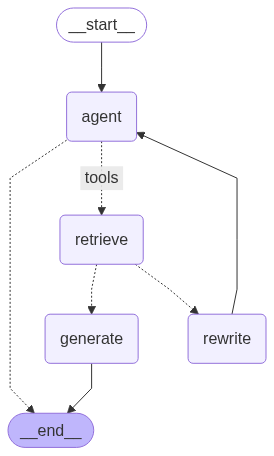

In [119]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [120]:
graph.invoke({"messages" : "What is langchain?"})

____CALL AGENT____
_____DECISION: DOCS RELEVANT_____
____GENERATE____


{'messages': [HumanMessage(content='What is langchain?', additional_kwargs={}, response_metadata={}, id='31aae31e-48bc-4263-aa4a-ce04627fe181'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is langchain?" I need to figure out which tool to use here. Let me check the available functions. There\'s one called retriever_vector_db_blog for Langgraph and another called retriever_vector_langchain_blog for Langchain. Since the question is about Langchain, the second function seems appropriate. I should call that function with a query parameter that\'s a general question about Langchain. The query should probably be "What is Langchain?" to get the most relevant information. I need to make sure the arguments are correctly formatted as JSON within the tool_call tags. Let me structure the response accordingly.\n', 'tool_calls': [{'id': 'r4gsfdtw7', 'function': {'arguments': '{"query":"What is Langchain?"}', 'name': 'retriever_vector_langchain_blog

In [121]:
graph.invoke({"messages" : "What is Machine Learning?"})

____CALL AGENT____


{'messages': [HumanMessage(content='What is Machine Learning?', additional_kwargs={}, response_metadata={}, id='b7e49448-6978-4498-9fe2-ac1b3e9f3cfa'),
  AIMessage(content="The provided tools are designed to search for information related to Langgraph and Langchain. Since your question is about Machine Learning, which is a broader field, I can't use the available tools to retrieve a specific answer. However, I can tell you that Machine Learning is a subset of artificial intelligence that involves building systems that can learn from data, identify patterns, and make decisions with minimal human intervention. It encompasses various algorithms and statistical models that enable computers to improve their performance on a task through experience.", additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is Machine Learning?" Let me think about how to approach this. First, I need to determine if the provided tools can help answer this. The available functions are for search

In [122]:
graph.invoke({"messages" : "What is langgraph?"})

____CALL AGENT____
_____DECISION: DOCS RELEVANT_____
____GENERATE____


{'messages': [HumanMessage(content='What is langgraph?', additional_kwargs={}, response_metadata={}, id='c0e2e527-7a1e-40af-ac8f-6e7c744703e0'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking "What is langgraph?" Let me see. First, I need to determine which tool to use here. The available functions are retriever_vector_db_blog for Langgraph and retriever_vector_langchain_blog for langchain. Since the user specifically mentioned "langgraph," I should use the first function. The parameters require a "query" string. The question is straightforward, so the query should be "What is langgraph?" I\'ll call the retriever_vector_db_blog function with that query to get the necessary information.\n', 'tool_calls': [{'id': 'h0y4axb6z', 'function': {'arguments': '{"query":"What is langgraph?"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 143, 'prompt_tokens': 243, 'total_tokens': 386,